In [2]:
!pip install tensorflow opencv-python matplotlib scikit-learn

import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

print('TensorFlow version:', keras.__version__)

  Using cached matplotlib-3.10.6-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached wrapt-1.17.3-cp311-cp311-win_amd64.whl.metadata (6.5 kB)
  Using cached grpcio-1.74.0-cp311-cp311-win_amd64.whl.metadata (4.0 kB)
  Using cached h5py-3.14.0-cp311-cp311-win_amd64.whl.metadata (2.7 kB)
  Using cached ml_dtypes-0.5.3-cp311-cp311-win_amd64.whl.metadata (9.2 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)

c:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

TensorFlow version: 3.11.3


Folders inside DATA_DIR: ['WithMask', 'WithoutMask']
Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Class indices: {'WithMask': 0, 'WithoutMask': 1}
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 10s 1us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

c:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 692ms/step - accuracy: 0.8146 - loss: 0.3845

250/250 ━━━━━━━━━━━━━━━━━━━━ 224s 872ms/step - accuracy: 0.9124 - loss: 0.2144 - val_accuracy: 0.9780 - val_loss: 0.0709 - learning_rate: 1.0000e-04
Epoch 2/12
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 942ms/step - accuracy: 0.9696 - loss: 0.0861

250/250 ━━━━━━━━━━━━━━━━━━━━ 333s 1s/step - accuracy: 0.9729 - loss: 0.0792 - val_accuracy: 0.9865 - val_loss: 0.0453 - learning_rate: 1.0000e-04
Epoch 3/12
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9800 - loss: 0.0609

250/250 ━━━━━━━━━━━━━━━━━━━━ 486s 2s/step - accuracy: 0.9799 - loss: 0.0612 - val_accuracy: 0.9885 - val_loss: 0.0391 - learning_rate: 1.0000e-04
Epoch 4/12
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9831 - loss: 0.0470

250/250 ━━━━━━━━━━━━━━━━━━━━ 325s 1s/step - accuracy: 0.9827 - loss: 0.0480 - val_accuracy: 0.9880 - val_loss: 0.0368 - learning_rate: 1.0000e-04
Epoch 5/12
250/250 ━━━━━━━━━━━━━━━━━━━━ 280s 1s/step - accuracy: 0.9826 - loss: 0.0469 - val_accuracy: 0.9885 - val_loss: 0.0368 - learning_rate: 1.0000e-04
Epoch 6/12
250/250 ━━━━━━━━━━━━━━━━━━━━ 243s 971ms/step - accuracy: 0.9847 - loss: 0.0405 - val_accuracy: 0.9855 - val_loss: 0.0380 - learning_rate: 1.0000e-04
Epoch 7/12
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 682ms/step - accuracy: 0.9861 - loss: 0.0399

250/250 ━━━━━━━━━━━━━━━━━━━━ 205s 821ms/step - accuracy: 0.9862 - loss: 0.0388 - val_accuracy: 0.9910 - val_loss: 0.0286 - learning_rate: 1.0000e-04
Epoch 8/12
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 581ms/step - accuracy: 0.9862 - loss: 0.0378

250/250 ━━━━━━━━━━━━━━━━━━━━ 187s 746ms/step - accuracy: 0.9868 - loss: 0.0381 - val_accuracy: 0.9920 - val_loss: 0.0236 - learning_rate: 1.0000e-04
Epoch 9/12
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 632ms/step - accuracy: 0.9877 - loss: 0.0324

250/250 ━━━━━━━━━━━━━━━━━━━━ 196s 784ms/step - accuracy: 0.9872 - loss: 0.0369 - val_accuracy: 0.9930 - val_loss: 0.0211 - learning_rate: 1.0000e-04
Epoch 10/12
250/250 ━━━━━━━━━━━━━━━━━━━━ 177s 706ms/step - accuracy: 0.9858 - loss: 0.0388 - val_accuracy: 0.9915 - val_loss: 0.0257 - learning_rate: 1.0000e-04
Epoch 11/12
250/250 ━━━━━━━━━━━━━━━━━━━━ 206s 823ms/step - accuracy: 0.9893 - loss: 0.0318 - val_accuracy: 0.9925 - val_loss: 0.0226 - learning_rate: 1.0000e-04
Epoch 12/12
250/250 ━━━━━━━━━━━━━━━━━━━━ 186s 742ms/step - accuracy: 0.9904 - loss: 0.0296 - val_accuracy: 0.9935 - val_loss: 0.0263 - learning_rate: 1.0000e-04
Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 209s 811ms/step - accuracy: 0.9344 - loss: 0.1941 - val_accuracy: 0.9840 - val_loss: 0.0350 - learning_rate: 1.0000e-05
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 241s 963ms/step - accuracy: 0.9808 - loss: 0.0523 - val_accuracy: 0.9885 - val_loss: 0.0355 - learning_rate: 1.0000e-05
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 247s 988ms/

250/250 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.9875 - loss: 0.0364 - val_accuracy: 0.9930 - val_loss: 0.0207 - learning_rate: 5.0000e-06
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 241s 966ms/step - accuracy: 0.9910 - loss: 0.0248 - val_accuracy: 0.9920 - val_loss: 0.0231 - learning_rate: 5.0000e-06


Saved model to mask_detector_mobilenetv2.h5
Validation loss: 0.0216, Validation accuracy: 0.9900


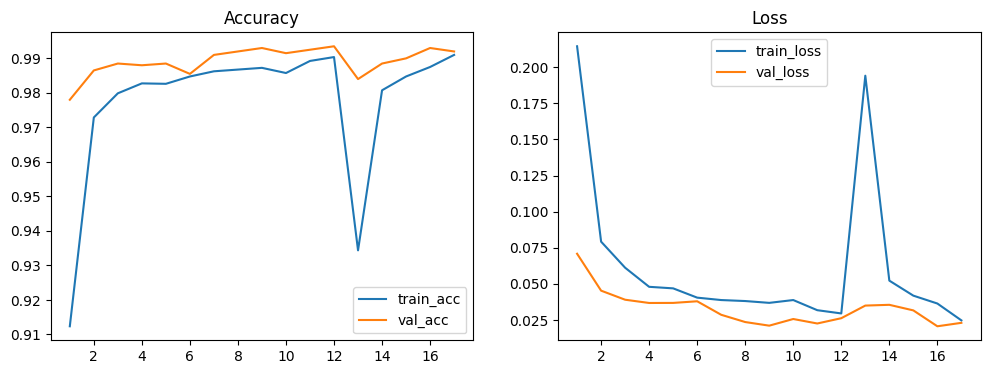

In [3]:
import os, cv2, numpy as np, matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

DATA_DIR = "F:\shivani\DL_assignments\DL_2\dataset\Face Mask Dataset\Train"  
IMG_SIZE = (224,224)
BATCH_SIZE = 32
EPOCHS = 12
BEST_WEIGHTS = "best_mask_detector.h5"
MODEL_FINAL = "mask_detector_mobilenetv2.h5"

print("Folders inside DATA_DIR:", os.listdir(DATA_DIR))

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="training",
    shuffle=True,
    seed=42
)
val_gen = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="validation",
    shuffle=True,
    seed=42
)

print("Class indices:", train_gen.class_indices)

base = MobileNetV2(weights="imagenet", include_top=False, input_shape=(IMG_SIZE[0],IMG_SIZE[1],3))
base.trainable = False

model = keras.Sequential([
    base,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=keras.optimizers.Adam(1e-4),
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.summary()

callbacks = [
    EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True),
    ModelCheckpoint(BEST_WEIGHTS, save_best_only=True, monitor="val_loss"),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-7)
]

history = model.fit(train_gen, validation_data=val_gen, epochs=EPOCHS, callbacks=callbacks)

base.trainable = True
for layer in base.layers[:-40]:
    layer.trainable = False

model.compile(optimizer=keras.optimizers.Adam(1e-5),
              loss="binary_crossentropy",
              metrics=["accuracy"])

ft_history = model.fit(train_gen, validation_data=val_gen, epochs=5, callbacks=callbacks)

model.save(MODEL_FINAL)
print("Saved model to", MODEL_FINAL)

val_loss, val_acc = model.evaluate(val_gen, verbose=0)
print(f"Validation loss: {val_loss:.4f}, Validation accuracy: {val_acc:.4f}")

def plot_histories(h1, h2=None):
    acc = h1.history.get("accuracy", [])
    val_acc = h1.history.get("val_accuracy", [])
    loss = h1.history.get("loss", [])
    val_loss = h1.history.get("val_loss", [])
    if h2:
        acc += h2.history.get("accuracy", [])
        val_acc += h2.history.get("val_accuracy", [])
        loss += h2.history.get("loss", [])
        val_loss += h2.history.get("val_loss", [])
    epochs = range(1, len(acc)+1)
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, acc, label="train_acc")
    plt.plot(epochs, val_acc, label="val_acc")
    plt.title("Accuracy"); plt.legend()
    plt.subplot(1,2,2)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("Loss"); plt.legend()
    plt.show()

plot_histories(history, ft_history)

def predict_image(img_path, model, img_size=IMG_SIZE, threshold=0.5):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_rs = cv2.resize(img_rgb, img_size)
    x = img_rs.astype("float32")/255.0
    x = np.expand_dims(x, axis=0)
    prob = model.predict(x)[0][0]
    label = "without_mask" if prob >= threshold else "with_mask"
    return prob, label

def webcam_inference(model_path=MODEL_FINAL, face_cascade_xml=None, threshold=0.5):
    net = keras.models.load_model(model_path)
    if face_cascade_xml is None:
        face_cascade_xml = cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
    face_cascade = cv2.CascadeClassifier(face_cascade_xml)
    cap = cv2.VideoCapture(0)
    while True:
        ret, frame = cap.read()
        if not ret: break
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        rects = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(60,60))
        for (x,y,w,h) in rects:
            face = frame[y:y+h, x:x+w]
            face_rgb = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
            face_rs = cv2.resize(face_rgb, IMG_SIZE).astype("float32")/255.0
            prob = net.predict(np.expand_dims(face_rs, axis=0))[0][0]
            label = "No Mask" if prob >= threshold else "Mask"
            color = (0,0,255) if label=="No Mask" else (0,255,0)
            cv2.putText(frame, f"{label} {prob:.2f}", (x,y-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)
            cv2.rectangle(frame, (x,y), (x+w, y+h), color, 2)
        cv2.imshow("Mask Detector", frame)
        if cv2.waitKey(1) & 0xFF == ord("q"): break
    cap.release(); cv2.destroyAllWindows()
